In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

def show(img):
    rgb_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

186 201 261 154


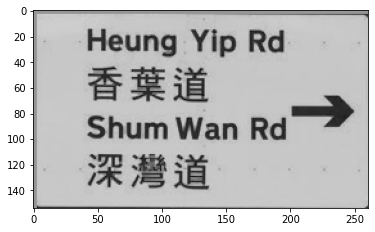

Heung Yip Rd

oe StI

Shum Wan ra
a : |



In [37]:
import cv2

highway = cv2.imread("./ocean_park.jpeg")
gray_img = cv2.cvtColor(highway, cv2.COLOR_BGR2GRAY)
gaussian_blur_img = cv2.GaussianBlur(gray_img, (11, 11), 0)
canny_img = cv2.Canny(gray_img, 50, 100)
show(canny_img)
contours, _ = cv2.findContours(canny_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Show contours
# copied_img = highway.copy()
# cv.drawContours(image=copied_img, 
#     contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv.LINE_AA)
# show(copied_img)

contour_lists = sorted(contours, key = cv2.contourArea,reverse=True)
c = contour_lists[2]
x,y,w,h = cv2.boundingRect(c)
print(x,y,w,h)

img = cv2.rectangle(highway,(x,y),(x+w,y+h),(0,255,0),2)

road_sign = highway[y:(y+h),x:(x+w)]

cv.imwrite('./road_sign.jpg',road_sign)


gray_road_sign = cv2.cvtColor(road_sign,cv2.COLOR_BGR2GRAY)
kernel = np.ones((2,2))
gray_road_sign = cv2.erode(gray_road_sign,kernel)
gray_road_sign = cv2.dilate(gray_road_sign,kernel)
show(gray_road_sign)



result = pytesseract.image_to_string(gray_road_sign,config="--psm 6")
print(result)